In [1]:
import pandas as pd

import plotly
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=True)

In [2]:
df_prc = pd.read_csv('./bloom_data/gc_data_check.csv', header=0, index_col=0, parse_dates=True)
df_ret = df_prc.pct_change()

In [3]:
df_prc.tail()

,GC1 Comdty,GC2 Comdty,GC1 n:04_0_n comdty,GC1 n:04_0_r comdty
2020-01-02,1528.1,1534.3,1528.1,1528.1
2020-01-03,1552.4,1558.7,1552.4,1552.4
2020-01-06,1568.8,1575.1,1568.8,1568.8
2020-01-07,1574.3,1580.5,1574.3,1574.3
2020-01-08,1595.3,1566.5,1595.3,1595.3


In [4]:
df_prc.iloc[5028]

GC1 Comdty             1595.3
GC2 Comdty             1566.5
GC1 n:04_0_n comdty    1595.3
GC1 n:04_0_r comdty    1595.3
Name: 2020-01-08 00:00:00, dtype: float64

In [5]:
df_prc.shape[0]

5029

In [6]:
i = 1

adj_ret = {}

while i < df_prc.shape[0]:
    tday_front_diff = abs(df_prc.loc[:, 'GC1 Comdty'].iloc[i] - df_prc.loc[:, 'GC1 n:04_0_n comdty'].iloc[i])
    tday_next_diff = abs(df_prc.loc[:, 'GC2 Comdty'].iloc[i] - df_prc.loc[:, 'GC1 n:04_0_n comdty'].iloc[i])
    yday_front_diff = abs(df_prc.loc[:, 'GC1 Comdty'].iloc[i-1] - df_prc.loc[:, 'GC1 n:04_0_n comdty'].iloc[i-1])
    yday_next_diff = abs(df_prc.loc[:, 'GC2 Comdty'].iloc[i-1] - df_prc.loc[:, 'GC1 n:04_0_n comdty'].iloc[i-1])
    
    if (tday_next_diff <= tday_front_diff) & (yday_next_diff > yday_front_diff):
        adj_ret[df_prc.index[i]] = df_ret.loc[:, 'GC1 Comdty'].iloc[i]
    else:
        adj_ret[df_prc.index[i]] = df_ret.loc[:, 'GC1 n:04_0_n comdty'].iloc[i]
    
    i = i + 1

In [9]:
adj_ret = pd.Series(adj_ret)

In [10]:
adj_ret.head()

2000-01-05   -0.005640
2000-01-06    0.001063
2000-01-07    0.001771
2000-01-10   -0.000707
2000-01-11    0.006013
dtype: float64

In [11]:
adj_prc = (1.+adj_ret).cumprod()

In [12]:
comp_prc = (1.+df_ret.loc[:, ['GC1 n:04_0_r comdty', 'GC1 n:04_0_n comdty']].iloc[1:]).cumprod()

In [13]:
to_plot = pd.concat([adj_prc, comp_prc], axis=1)

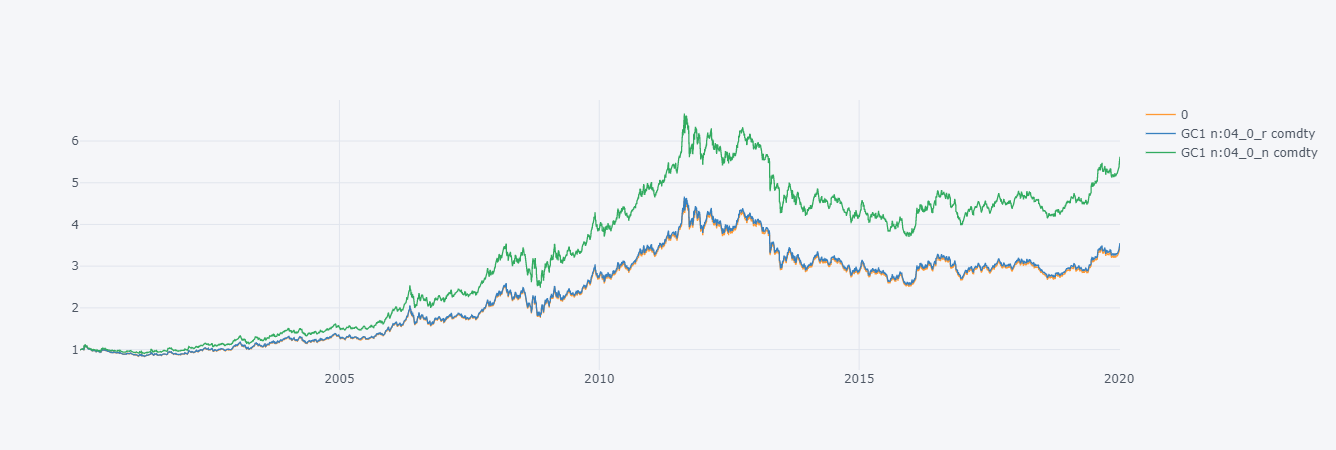

In [14]:
to_plot.iplot()